## Datamining assignment - Regression 
 

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler


In [39]:
df = pd.read_csv("data/Metro_Interstate_Traffic_Volume.csv")
# print(type(df))
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date,time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02,09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02,10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02,11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02,12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02,13:00:00,4918


**Since date is unique to every instance, we need to drop it as it does not provide any information to the model**

In [41]:
df = df.drop('date', axis='columns')

In [42]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,13:00:00,4918


### Explore the data

In [43]:
# print("Rows ", len(df))
# print("Columns ", len(df.columns))
print(df.shape)

(48204, 9)


**This is a very large dataset. 48,204 instances.**

In [44]:
# print(df.describe())
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


**Note: count variable suggest no missing data.**

In [7]:
print(df.weather_main.value_counts())

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


In [8]:
print(df.weather_description.value_counts())

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [9]:
print(df.holiday.value_counts())

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64


In [63]:
print(df.time.value_counts())

 04:00:00    2091
 06:00:00    2087
 08:00:00    2080
 07:00:00    2079
 10:00:00    2078
 05:00:00    2063
 01:00:00    2049
 23:00:00    2040
 00:00:00    2037
 03:00:00    2025
 02:00:00    2019
 09:00:00    2018
 22:00:00    1994
 16:00:00    1988
 18:00:00    1986
 21:00:00    1982
 20:00:00    1979
 14:00:00    1969
 19:00:00    1961
 12:00:00    1955
 11:00:00    1952
 15:00:00    1934
 17:00:00    1933
 13:00:00    1905
Name: time, dtype: int64


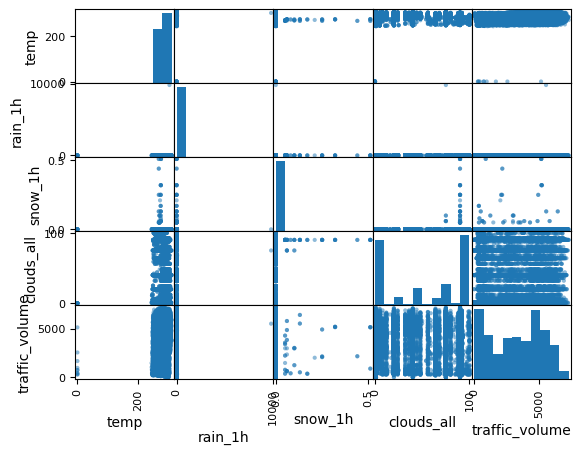

<Figure size 640x480 with 0 Axes>

In [66]:
# Draw scatter matrix
# scatter_matrix(df, figsize=(10, 10))
scatter_matrix(df)
plt.show()
plt.savefig('plots/RegressionScatter.png')

### Preparing the data

In [46]:
dfHotCoded = pd.get_dummies(df)
print(dfHotCoded.shape)

pd.set_option('display.max_columns', None)

(48204, 90)


In [47]:
dfHotCoded.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,time_ 00:00:00,time_ 01:00:00,time_ 02:00:00,time_ 03:00:00,time_ 04:00:00,time_ 05:00:00,time_ 06:00:00,time_ 07:00:00,time_ 08:00:00,time_ 09:00:00,time_ 10:00:00,time_ 11:00:00,time_ 12:00:00,time_ 13:00:00,time_ 14:00:00,time_ 15:00:00,time_ 16:00:00,time_ 17:00:00,time_ 18:00:00,time_ 19:00:00,time_ 20:00:00,time_ 21:00:00,time_ 22:00:00,time_ 23:00:00
0,288.28,0.0,0.0,40,5545,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,4516,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,4767,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,5026,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,4918,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Number of attributes changed from 9 to 66**

In [48]:
dfHotCoded.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,time_ 00:00:00,time_ 01:00:00,time_ 02:00:00,time_ 03:00:00,time_ 04:00:00,time_ 05:00:00,time_ 06:00:00,time_ 07:00:00,time_ 08:00:00,time_ 09:00:00,time_ 10:00:00,time_ 11:00:00,time_ 12:00:00,time_ 13:00:00,time_ 14:00:00,time_ 15:00:00,time_ 16:00:00,time_ 17:00:00,time_ 18:00:00,time_ 19:00:00,time_ 20:00:00,time_ 21:00:00,time_ 22:00:00,time_ 23:00:00
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.00000,48204.00000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.00000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.00000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355,0.000124,0.000104,0.000104,0.000145,0.000124,0.000104,0.000124,0.998735,0.000104,0.000124,0.000104,0.000104,0.277799,0.314580,0.037777,0.018920,0.028213,0.123434,0.117667,0.000415,0.059663,0.000083,0.021451,0.000083,0.035806,0.096797,0.013505,0.040578,0.018920,0.000041,0.028213,0.001328,0.009688,0.012779,0.02282,0.00027,0.069953,0.000124,0.000228,0.040370,0.123434,0.034520,0.105406,0.002821,0.013961,0.00027,0.001079,0.071799,0.000124,0.000021,0.241992,0.000062,0.000415,0.006078,0

In [49]:
# print(df.corr())
dfHotCoded.corr() 

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,time_ 00:00:00,time_ 01:00:00,time_ 02:00:00,time_ 03:00:00,time_ 04:00:00,time_ 05:00:00,time_ 06:00:00,time_ 07:00:00,time_ 08:00:00,time_ 09:00:00,time_ 10:00:00,time_ 11:00:00,time_ 12:00:00,time_ 13:00:00,time_ 14:00:00,time_ 15:00:00,time_ 16:00:00,time_ 17:00:00,time_ 18:00:00,time_ 19:00:00,time_ 20:00:00,time_ 21:00:00,time_ 22:00:00,time_ 23:00:00
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299,-0.011636,0.000726,0.008272,0.010597,-0.013337,0.007390,-0.016973,0.007713,0.007467,-0.005540,-0.002364,-0.008933,0.013210,0.013218,0.038469,-0.018638,-0.068821,-0.048643,0.158078,0.014849,-0.250239,0.007637,0.127770,0.007637,0.138934,-0.000416,0.015789,0.045062,-0.018638,-0.004031,-0.068821,0.010690,0.067637,-0.102789,0.034835,1.203764e-02,0.105466,-0.005267,-0.014716,-0.215900,-0.048643,0.080982,-0.098611,0.041068,0.105403,0.007789,0.022153,0.107108,-0.007100,-0.004277,-0.046459,-0.003229,0.014849,-0.063120,0.048265,0.003223,0.029098,0.011557,0.027423,0.023161,0.014224,-0.020357,-0.026414,-0.029094,-0.035576,-0.043024,-0.042386,-0.045677,-0.043104,-0.040512,-0.024016,-0.009775,0.011147,0.025530,0.033907,0.047111,0.051480,0.051227,0.049062,0.049117,0.034587,0.022415,0.009870,-0.003410,-0.012863
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714,-0.000073,-0.000076,-0.000076,0.000046,-0.000083,-0.000076,-0.000083,0.000216,-0.000076,-0.000083,-0.000076,-0.000076,-0.004629,-0.005056,-0.000782,-0.000767,-0.001093,-0.000804,0.015873,0.000088,-0.001738,0.000640,0.002826,0.000640,-0.001438,-0.002443,-0.000563,-0.001535,-0.000767,-0.000048,-0.001093,-0.000134,0.005129,-0.000846,-0.000524,-4.352967e-07,-0.001254,-0.000031,-0.000113,-0.001378,-0.000804,0.001028,-0.002562,-0.000122,0.001962,-0.000003,0.000163,-0.002076,-0.000083,-0.000034,-0.004217,-0.000059,0.000088,-0.000550,0.000896,0.000721,0.002211,0.000662,0.000262,0.000845,0.245916,-0.000945,-0.001012,-0.001003,-0.000789,-0.000905,-0.000775,-0.000663,-0.000695,-0.000983,-0.000937,-0.001089,-0.000850,-0.001113,-0.000980,-0.001085,-0.001134,-0.000964,0.022280,-0.001087,-0.000948,-0.00

**Note: Low correlation with all of the attributes. Expecting a poor model.**

### Build the model

In [50]:
X = dfHotCoded.drop('traffic_volume', axis='columns')
y = dfHotCoded.traffic_volume

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(36153, 89)
(12051, 89)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
print('R squared:', model.score(X_train, y_train))

intercept: 1423.76932141883
coefficients: [ 6.49356928e+00  9.08591365e-02 -1.39641909e+02 -1.62407571e+00
  1.02945862e+02 -3.65200000e+02  1.17131331e+02  6.98581228e+01
 -1.07467588e+02  7.71858180e+01  6.73947167e+02 -6.33388082e+00
 -3.00751652e+02  1.08619977e+02 -2.27812384e+02 -1.42122773e+02
  6.06201921e+01  1.33176944e+02  1.15388021e+02 -2.52001589e+01
  3.27475512e+01  4.54051851e+01 -4.51729109e+01 -1.21366829e+02
  1.11755408e+02 -1.17912653e+02 -1.89440749e+02 -1.17912653e+02
  4.39785335e+01  4.05261108e+01  7.44353192e+01 -2.28082983e+01
 -2.52001589e+01 -4.92632204e+01  3.27475512e+01  8.89656240e+01
  9.22830324e+01 -1.44191071e+02  8.09476366e+01  1.45929584e+02
  2.06911554e+02  2.67073624e+02 -9.42903507e+01 -4.53078763e+01
  4.54051851e+01  1.67509310e+02  1.19741705e+02  9.81072049e+01
  2.21431294e+02  5.03084476e+02  2.43605682e+02 -4.28257362e+00
 -1.28960558e+02  1.06884175e+03  1.66416587e+01 -5.29996130e+02
 -1.21366829e+02 -4.10374543e+02  3.11145001e+02

**Decent model with an R squared value of roughly 78%**

### Find the Root Mean Square Error

In [52]:
yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

941.0961264845957


### Make Predictions

In [61]:
# newData = [[255.25,0.0,0.0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]]
newData = [[288.28, 0.0, 0.0, 40, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[289.36, 0.0, 0.0, 75, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[289.58, 0.0, 0.0, 90, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[290.13, 0.0, 0.0, 90, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[291.14, 0.0, 0.0, 75, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

newDF = pd.DataFrame(newData, columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'holiday_Christmas Day', 'holiday_Columbus Day', 'holiday_Independence Day', 'holiday_Labor Day', 'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day', 'holiday_New Years Day', 'holiday_None', 'holiday_State Fair', 'holiday_Thanksgiving Day', 'holiday_Veterans Day', 'holiday_Washingtons Birthday', 'weather_main_Clear', 'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm', 'weather_description_SQUALLS', 'weather_description_Sky is Clear', 'weather_description_broken clouds', 'weather_description_drizzle', 'weather_description_few clouds', 'weather_description_fog', 'weather_description_freezing rain', 'weather_description_haze', 'weather_description_heavy intensity drizzle', 'weather_description_heavy intensity rain', 'weather_description_heavy snow', 'weather_description_light intensity drizzle', 'weather_description_light intensity shower rain', 'weather_description_light rain', 'weather_description_light rain and snow', 'weather_description_light shower snow', 'weather_description_light snow', 'weather_description_mist', 'weather_description_moderate rain', 'weather_description_overcast clouds', 'weather_description_proximity shower rain', 'weather_description_proximity thunderstorm', 'weather_description_proximity thunderstorm with drizzle', 'weather_description_proximity thunderstorm with rain', 'weather_description_scattered clouds', 'weather_description_shower drizzle', 'weather_description_shower snow', 'weather_description_sky is clear', 'weather_description_sleet', 'weather_description_smoke', 'weather_description_snow', 'weather_description_thunderstorm', 'weather_description_thunderstorm with drizzle', 'weather_description_thunderstorm with heavy rain', 'weather_description_thunderstorm with light drizzle', 'weather_description_thunderstorm with light rain', 'weather_description_thunderstorm with rain', 'weather_description_very heavy rain', 'time_ 00:00:00', 'time_ 01:00:00', 'time_ 02:00:00', 'time_ 03:00:00', 'time_ 04:00:00', 'time_ 05:00:00', 'time_ 06:00:00', 'time_ 07:00:00', 'time_ 08:00:00', 'time_ 09:00:00', 'time_ 10:00:00', 'time_ 11:00:00', 'time_ 12:00:00', 'time_ 13:00:00', 'time_ 14:00:00', 'time_ 15:00:00', 'time_ 16:00:00', 'time_ 17:00:00', 'time_ 18:00:00', 'time_ 19:00:00', 'time_ 20:00:00', 'time_ 21:00:00', 'time_ 22:00:00', 'time_ 23:00:00'])
#print(newDF)

In [62]:
y_hat = model.predict(newDF)
print('y_hat', y_hat)

y_hat [4467.11061032 4274.02091891 4578.53353252 4827.71130211 4794.31558144]
